In [1]:
import numpy as np 
import pandas as pd

### 시계열 데이터 분석

In [2]:
df = pd.read_csv('./health.csv')
df.columns = ['date', 'click']
df

,date,click
0,2019-01-01,36
1,2019-01-02,45
2,2019-01-03,41
3,2019-01-04,40
4,2019-01-05,40
...,...,...
360,2019-12-27,86
361,2019-12-28,80
362,2019-12-29,87
363,2019-12-30,88


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   click   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [7]:
df = df.set_index('date')
df

,click
date,
2019-01-01,36
2019-01-02,45
2019-01-03,41
2019-01-04,40
2019-01-05,40
...,...
2019-12-27,86
2019-12-28,80
2019-12-29,87


In [8]:
#문자열(명목척도)를 데이트타임(등간척도)로 변환
df.index = pd.to_datetime(df.index)

#### 시각 = Timestamp, 시간 = Timedelta

In [10]:
df.index[1]-df.index[0]

Timedelta('1 days 00:00:00')

In [11]:
df.index[0]

Timestamp('2019-01-01 00:00:00')

### 시계열 분해

In [12]:
import matplotlib.pyplot as plt

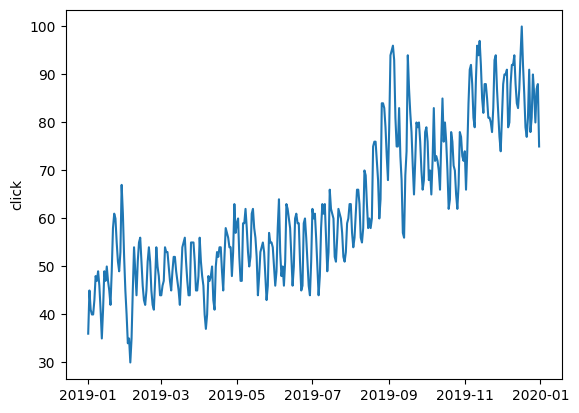

In [14]:
plt.plot(df.index, df['click'])
plt.ylabel('click')
plt.show()

In [19]:
#주기구하기
season = 7
trend = []

for i in range(len(df['click'])):
    trend.append(np.mean(df['click'][(i-(season//2)):(i+1+(season//2))]))
for i in range(season//2):
    trend[(i+1)*(-1)] = np.nan

In [20]:
trend

[nan,
 nan,
 nan,
 41.857142857142854,
 43.42857142857143,
 44.0,
 44.714285714285715,
 44.857142857142854,
 44.142857142857146,
 43.857142857142854,
 44.0,
 44.0,
 44.142857142857146,
 44.285714285714285,
 44.857142857142854,
 45.857142857142854,
 47.0,
 48.285714285714285,
 50.285714285714285,
 51.714285714285715,
 52.857142857142854,
 53.714285714285715,
 54.714285714285715,
 55.285714285714285,
 56.57142857142857,
 56.57142857142857,
 55.42857142857143,
 54.0,
 52.42857142857143,
 50.285714285714285,
 47.714285714285715,
 42.42857142857143,
 38.714285714285715,
 37.714285714285715,
 39.0,
 40.285714285714285,
 41.714285714285715,
 44.0,
 47.57142857142857,
 50.57142857142857,
 51.42857142857143,
 50.285714285714285,
 49.42857142857143,
 49.142857142857146,
 48.285714285714285,
 47.714285714285715,
 47.42857142857143,
 47.42857142857143,
 47.285714285714285,
 47.142857142857146,
 47.0,
 47.285714285714285,
 47.714285714285715,
 47.142857142857146,
 46.714285714285715,
 46.5714285714

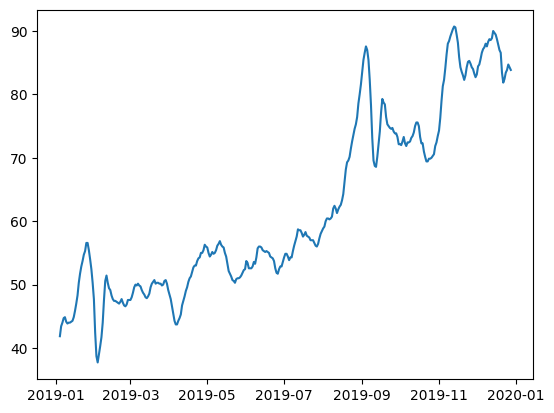

In [21]:
plt.plot(df.index, trend)

### de-trend

In [22]:
# 시계열 데이터 - 추세 = 주기+ 잔차
detrend = []
for a, i in enumerate(df['click']):
    detrend.append(i-trend[a])
detrend

[nan,
 nan,
 nan,
 -1.857142857142854,
 -3.4285714285714306,
 -1.0,
 3.2857142857142847,
 2.142857142857146,
 4.857142857142854,
 2.142857142857146,
 -3.0,
 -9.0,
 -3.142857142857146,
 4.714285714285715,
 2.142857142857146,
 4.142857142857146,
 0.0,
 -3.2857142857142847,
 -8.285714285714285,
 -2.7142857142857153,
 5.142857142857146,
 7.285714285714285,
 5.285714285714285,
 -0.2857142857142847,
 -5.571428571428569,
 -7.571428571428569,
 -2.4285714285714306,
 13.0,
 8.57142857142857,
 1.7142857142857153,
 -2.7142857142857153,
 -2.4285714285714306,
 -4.714285714285715,
 -2.7142857142857153,
 -9.0,
 -5.285714285714285,
 3.2857142857142847,
 10.0,
 1.4285714285714306,
 -6.571428571428569,
 -0.4285714285714306,
 4.714285714285715,
 6.571428571428569,
 1.857142857142854,
 -2.2857142857142847,
 -4.714285714285715,
 -5.428571428571431,
 -2.4285714285714306,
 3.7142857142857153,
 6.857142857142854,
 4.0,
 -2.2857142857142847,
 -5.714285714285715,
 -6.142857142857146,
 0.2857142857142847,
 7.4285

In [23]:
# detrend - 주기 = 잔차
seasonal = []
for i in range(season):
    imsi = []
    for w in detrend[i::season]: # i 부터 끝까지 season 마다 
        if np.isnan(w) == False:
            imsi.append(w)
        else:
            pass
    seasonal.append(np.mean(imsi))

seasonal #화수목금토일월 순서
 

[4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028]

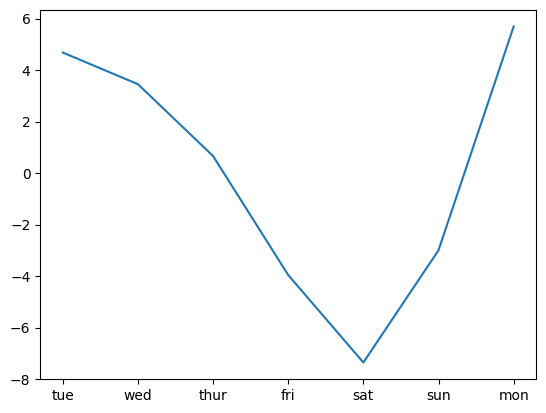

In [24]:
plt.plot(['tue','wed','thur','fri','sat','sun','mon'], seasonal)
plt.show()

In [26]:
# 주기데이터들을 다 이어서 나누어주면 detrend의 길이가 나온다.
seasonal_subtract = []
for i in range(len(detrend)//len(seasonal)):
    for w in seasonal: 
        seasonal_subtract.append(w)
for i in seasonal[:len(detrend)%len(seasonal)]:
    seasonal_subtract.append(i)
seasonal_subtract

[4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.69187675070028,
 4.680672268907562,
 3.450980392156864,
 0.6610644257703084,
 -3.9587912087912094,
 -7.354395604395605,
 -2.9943977591036424,
 5.6

In [27]:
# 잔차 구하기..
residual = []
for a, i in enumerate(seasonal_subtract):
    residual.append(detrend[a]-i)
residual

[nan,
 nan,
 nan,
 2.1016483516483553,
 3.9258241758241743,
 1.9943977591036424,
 -2.4061624649859956,
 -2.5378151260504165,
 1.4061624649859903,
 1.4817927170868375,
 0.9587912087912094,
 -1.645604395604395,
 -0.14845938375350354,
 -0.977591036414565,
 -2.5378151260504165,
 0.6918767507002821,
 -0.6610644257703084,
 0.6730769230769247,
 -0.9313186813186798,
 0.28011204481792706,
 -0.5490196078431344,
 2.6050420168067223,
 1.834733893557421,
 -0.9467787114845931,
 -1.61263736263736,
 -0.21703296703296449,
 0.5658263305322118,
 7.30812324929972,
 3.890756302521007,
 -1.7366946778711485,
 -3.3753501400560237,
 1.5302197802197788,
 2.6401098901098896,
 0.28011204481792706,
 -14.691876750700281,
 -9.966386554621847,
 -0.1652661064425791,
 9.33893557422969,
 5.38736263736264,
 0.7829670329670355,
 2.5658263305322118,
 -0.977591036414565,
 1.890756302521007,
 -1.5938375350140097,
 -2.946778711484593,
 -0.7554945054945059,
 1.9258241758241743,
 0.5658263305322118,
 -1.977591036414565,
 2.1764

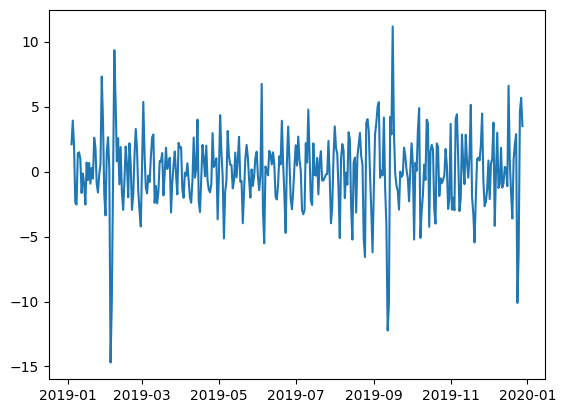

In [28]:
plt.plot(df.index, residual)

- 이동평균법에서 추세와 주기는 쉬운 수학으로 구할수 있었다. 하지만 잔차는 간단한 산술로는 구하기 힘듦
- 이동평균법에서 잔차만 구할 수 있다면 모든 시계열 분석을 할 수 있다고 평가 